<h1>TUGAS BESAR TAHAP 2 MACHINE LEARNING</h1>
<h1> CLASSIFICATION </h1>

<h2>Library yang digunakan </h2>

In [2]:
import csv
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [3]:
data_train = pd.read_csv("salju_train.csv")
data_test = pd.read_csv("salju_test.csv")

<h2> data test salju dan data train salju disatukan dalam satu dataframe </h2> 

In [4]:
df1 = pd.DataFrame(data_train)
df2 = pd.DataFrame(data_test)
frames = [df1, df2]
dataset = pd.concat(frames)

<h2> Data Preprocessing </h2>

In [5]:
dataset.shape

(127277, 24)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127277 entries, 0 to 18181
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  float64
 1   Tanggal                   127277 non-null  object 
 2   KodeLokasi                127277 non-null  object 
 3   SuhuMin                   125990 non-null  float64
 4   SuhuMax                   126183 non-null  float64
 5   Hujan                     124459 non-null  float64
 6   Penguapan                 72397 non-null   float64
 7   SinarMatahari             66180 non-null   float64
 8   ArahAnginTerkencang       118252 non-null  object 
 9   KecepatanAnginTerkencang  118307 non-null  float64
 10  ArahAngin9am              118046 non-null  object 
 11  ArahAngin3pm              123584 non-null  object 
 12  KecepatanAngin9am         125726 non-null  float64
 13  KecepatanAngin3pm         124620 non-null  fl

In [7]:
dataset.describe()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,109095.000000,125990.000000,126183.000000,124459.000000,72397.000000,66180.000000,118307.000000,125726.000000,124620.000000,124945.000000,123355.000000,114085.000000,114116.000000,78391.000000,75350.000000,125718.000000,124137.000000
mean,54548.000000,12.201471,23.226354,2.377650,5.469173,7.603905,40.023726,14.040636,18.664412,68.880732,51.549212,1017.634863,1015.242807,4.450741,4.513603,16.999614,21.687295
std,31493.158146,6.395664,7.113840,8.550372,4.195609,3.790075,13.599594,8.912196,8.818594,19.018872,20.792633,7.121660,7.051440,2.885420,2.719652,6.484337,6.930820
min,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,27274.500000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,54548.000000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,81821.500000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,109095.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


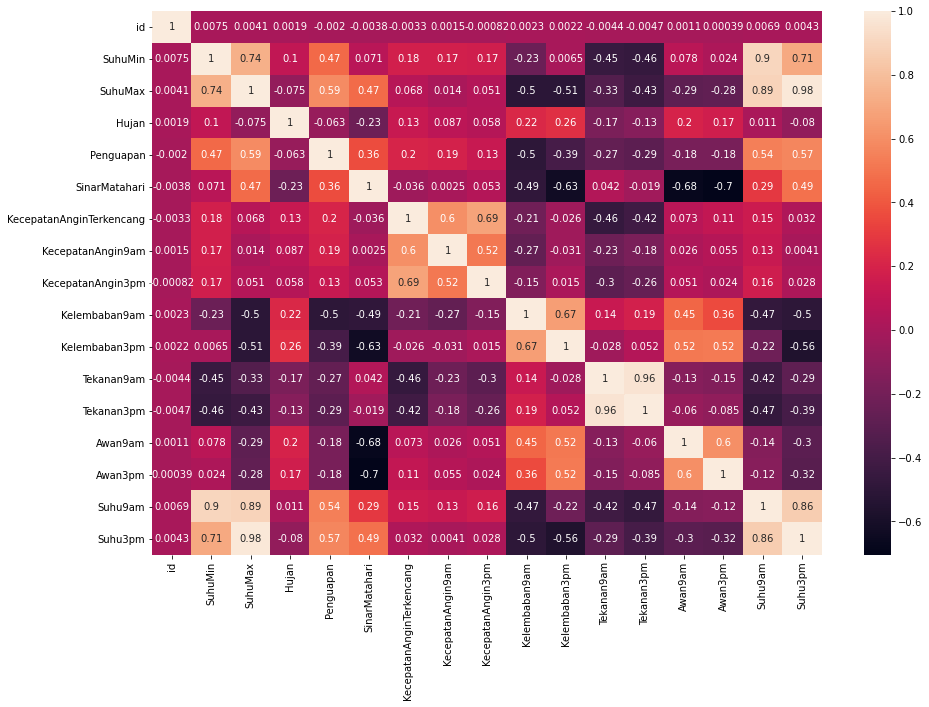

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
data1 = dataset.corr()
korelasi = sns.heatmap(data1, annot=True)

<h2> drop kolom yang tidak digunakan </h2>

In [9]:
df = dataset.drop(columns=['id', 'Tanggal', 'KodeLokasi'])

<h2> check missing values </h2>

In [10]:
df.isnull().sum()

SuhuMin                      1287
SuhuMax                      1094
Hujan                        2818
Penguapan                   54880
SinarMatahari               61097
ArahAnginTerkencang          9025
KecepatanAnginTerkencang     8970
ArahAngin9am                 9231
ArahAngin3pm                 3693
KecepatanAngin9am            1551
KecepatanAngin3pm            2657
Kelembaban9am                2332
Kelembaban3pm                3922
Tekanan9am                  13192
Tekanan3pm                  13161
Awan9am                     48886
Awan3pm                     51927
Suhu9am                      1559
Suhu3pm                      3140
BersaljuHariIni              2818
BersaljuBesok                2850
dtype: int64

<h2> fill missing values </h2>

In [11]:
df['SuhuMin'].fillna(df['SuhuMin'].mean(), inplace=True)
df['SuhuMax'].fillna(df['SuhuMax'].mean(), inplace=True)
df['Hujan'].fillna(df['Hujan'].mean(), inplace=True)
df['Penguapan'].fillna(df['Penguapan'].mean(), inplace=True)
df['SinarMatahari'].fillna(df['SinarMatahari'].mean(), inplace=True)
df['ArahAnginTerkencang'].fillna(df['ArahAnginTerkencang'].mode()[0], inplace=True)   #categorical
df['KecepatanAnginTerkencang'].fillna(df['KecepatanAnginTerkencang'].mean(), inplace=True)
df['ArahAngin9am'].fillna(df['ArahAngin9am'].mode()[0], inplace=True)  #categorical
df['ArahAngin3pm'].fillna(df['ArahAngin3pm'].mode()[0], inplace=True)  #categorical
df['KecepatanAngin9am'].fillna(df['KecepatanAngin9am'].mean(), inplace=True)
df['KecepatanAngin3pm'].fillna(df['KecepatanAngin3pm'].mean(), inplace=True)
df['Kelembaban9am'].fillna(df['Kelembaban9am'].mean(), inplace=True)
df['Kelembaban3pm'].fillna(df['Kelembaban3pm'].mean(), inplace=True)
df['Tekanan9am'].fillna(df['Tekanan9am'].mean(), inplace=True)
df['Tekanan3pm'].fillna(df['Tekanan3pm'].mean(), inplace=True)
df['Awan9am'].fillna(df['Awan9am'].mean(), inplace=True)
df['Awan3pm'].fillna(df['Awan3pm'].mean(), inplace=True)
df['Suhu9am'].fillna(df['Suhu9am'].mean(), inplace=True)
df['Suhu3pm'].fillna(df['Suhu3pm'].mean(), inplace=True)
df['BersaljuHariIni'].fillna(df['BersaljuHariIni'].mode()[0], inplace=True)  #categorical
df['BersaljuBesok'].fillna(df['BersaljuBesok'].mode()[0], inplace=True)   #categorical

In [12]:
df.isnull().sum()

SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

<h2> Mengubah data categorical menjadi numerical </h2>

In [13]:
df['BersaljuHariIni'].replace(to_replace = ['No', 'Yes'], value =['Tidak','Ya'], inplace=True)
df['BersaljuBesok'].replace(to_replace = ['No', 'Yes'], value =['Tidak','Ya'], inplace=True)

In [14]:
temp = ['ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm','BersaljuHariIni','BersaljuBesok']
for i in temp:
  temp2 = LabelEncoder()
  df[i] = temp2.fit_transform(df[i].astype('str'))

In [15]:
df

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,10.4,15.5,4.8,5.469173,7.603905,15,24.000000,3,15,0.0,...,78.0,76.0,1020.100000,1018.500000,4.450741,4.513603,13.1,15.0,1,0
1,9.0,17.0,8.0,2.600000,7.400000,13,40.023726,12,14,13.0,...,80.0,61.0,1015.200000,1014.600000,7.000000,5.000000,11.9,15.5,1,1
2,18.2,32.0,0.0,5.469173,7.603905,2,44.000000,9,9,15.0,...,62.0,42.0,1017.634863,1015.242807,4.450741,4.513603,23.8,29.6,0,0
3,7.3,24.5,0.0,8.400000,10.400000,11,54.000000,3,12,13.0,...,25.0,17.0,1019.200000,1016.900000,1.000000,7.000000,15.3,23.2,0,0
4,5.9,20.3,0.0,3.600000,12.600000,3,37.000000,6,2,22.0,...,55.0,48.0,1019.700000,1014.700000,2.000000,6.000000,12.4,18.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,7.8,25.8,0.0,8.000000,13.200000,4,31.000000,1,7,22.0,...,59.0,21.0,1017.100000,1014.200000,6.000000,1.000000,16.8,24.0,0,0
18178,12.4,26.6,0.0,8.000000,11.600000,7,37.000000,4,14,17.0,...,59.0,25.0,1022.200000,1018.700000,1.000000,1.000000,17.1,25.7,0,0
18179,6.7,22.9,0.0,5.469173,7.603905,13,40.023726,3,7,0.0,...,84.0,35.0,1017.634863,1015.242807,1.000000,2.000000,11.8,22.0,0,0
18180,12.5,26.7,0.0,9.000000,10.800000,4,35.000000,12,1,2.0,...,56.0,45.0,1021.900000,1018.100000,5.000000,5.000000,22.9,25.4,0,0


<h2> check data outliers </h2>

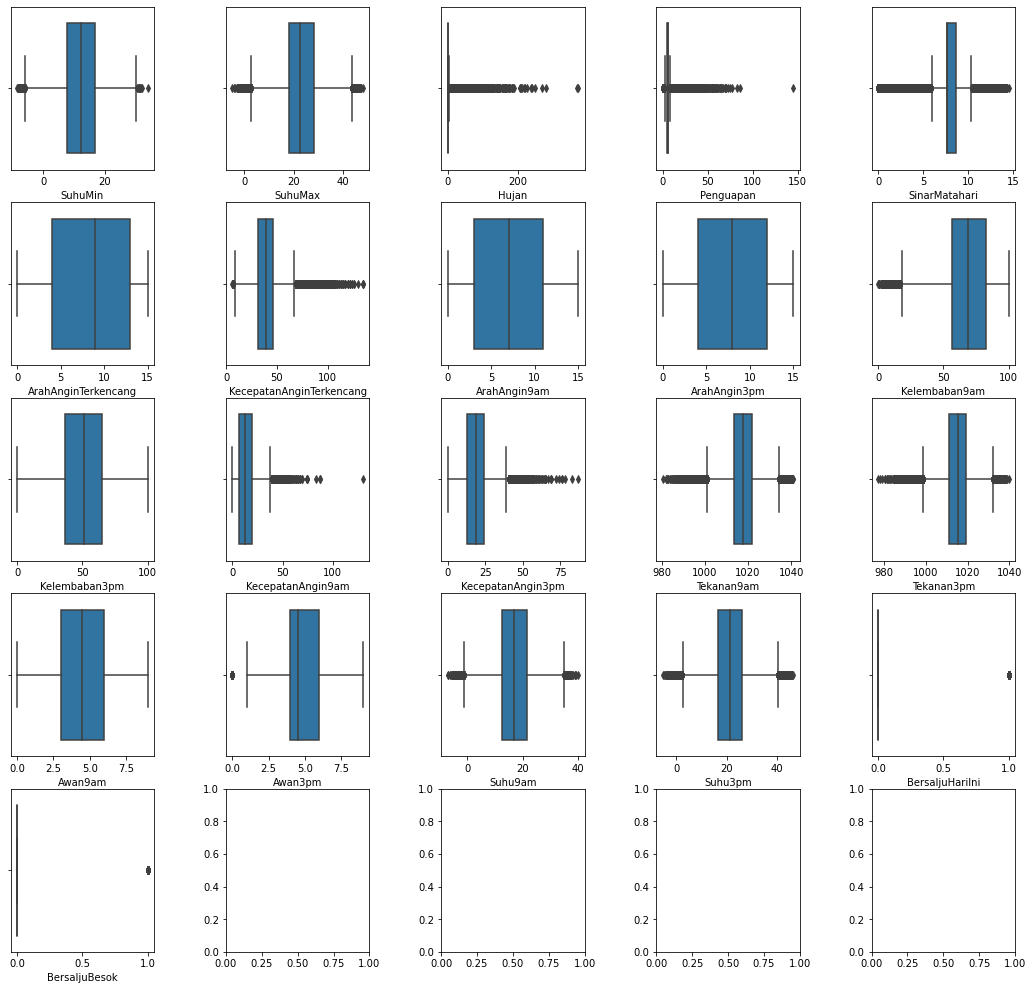

In [16]:
fig, axs = plt.subplots(5,5, figsize = (18,7))

sns.boxplot(x=df['SuhuMin'], ax = axs[0][0])
sns.boxplot(x=df['SuhuMax'], ax = axs[0][1])
sns.boxplot(x=df['Hujan'], ax = axs[0][2])
sns.boxplot(x=df['Penguapan'], ax = axs[0][3])
sns.boxplot(x=df['SinarMatahari'], ax = axs[0][4])
sns.boxplot(x=df['ArahAnginTerkencang'], ax = axs[1][0])
sns.boxplot(x=df['KecepatanAnginTerkencang'], ax = axs[1][1])
sns.boxplot(x=df['ArahAngin9am'], ax = axs[1][2])
sns.boxplot(x=df['ArahAngin3pm'], ax = axs[1][3])
sns.boxplot(x=df['Kelembaban9am'], ax = axs[1][4])
sns.boxplot(x=df['Kelembaban3pm'], ax = axs[2][0])
sns.boxplot(x=df['KecepatanAngin9am'], ax = axs[2][1])
sns.boxplot(x=df['KecepatanAngin3pm'], ax = axs[2][2])
sns.boxplot(x=df['Tekanan9am'], ax = axs[2][3])
sns.boxplot(x=df['Tekanan3pm'], ax = axs[2][4])
sns.boxplot(x=df['Awan9am'], ax = axs[3][0])
sns.boxplot(x=df['Awan3pm'], ax = axs[3][1])
sns.boxplot(x=df['Suhu9am'], ax = axs[3][2])
sns.boxplot(x=df['Suhu3pm'], ax = axs[3][3])
sns.boxplot(x=df['BersaljuHariIni'], ax = axs[3][4])
sns.boxplot(x=df['BersaljuBesok'], ax = axs[4][0])

plt.subplots_adjust(wspace=0.5, top=2)

<h2> Normalisasi data </h2>

In [17]:
minmax = MinMaxScaler()
datascaling = minmax.fit_transform(df)
kolom = ["Suhu9am","Suhu3pm","SuhuMin","SuhuMax","Hujan","Penguapan","SinarMatahari","ArahAnginTerkencang","KecepatanAnginTerkencang","ArahAngin9am","ArahAngin3pm","KecepatanAngin3pm","KecepatanAngin9am","Kelembaban9am","Kelembaban3pm","Tekanan9am","Tekanan3pm","Awan3pm","Awan9am","BersaljuBesok","BersaljuHariIni"]
scaled = pd.DataFrame(datascaling, columns=kolom)

In [18]:
scaled

,Suhu9am,Suhu3pm,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,KecepatanAngin3pm,KecepatanAngin9am,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan3pm,Awan9am,BersaljuBesok,BersaljuHariIni
0,0.445755,0.383743,0.012938,0.037718,0.524407,1.000000,0.139535,0.200000,1.000000,0.000000,...,0.78,0.76,0.654545,0.662400,0.494527,0.501511,0.428270,0.391555,1.0,0.0
1,0.412736,0.412098,0.021563,0.017931,0.510345,0.866667,0.263750,0.800000,0.933333,0.100000,...,0.80,0.61,0.573554,0.600000,0.777778,0.555556,0.402954,0.401152,1.0,1.0
2,0.629717,0.695652,0.000000,0.037718,0.524407,0.133333,0.294574,0.600000,0.600000,0.115385,...,0.62,0.42,0.613799,0.610285,0.494527,0.501511,0.654008,0.671785,0.0,0.0
3,0.372642,0.553875,0.000000,0.057931,0.717241,0.733333,0.372093,0.200000,0.800000,0.100000,...,0.25,0.17,0.639669,0.636800,0.111111,0.777778,0.474684,0.548944,0.0,0.0
4,0.339623,0.474480,0.000000,0.024828,0.868966,0.200000,0.240310,0.400000,0.133333,0.169231,...,0.55,0.48,0.647934,0.601600,0.222222,0.666667,0.413502,0.451056,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127272,0.384434,0.578450,0.000000,0.055172,0.910345,0.266667,0.193798,0.066667,0.466667,0.169231,...,0.59,0.21,0.604959,0.593600,0.666667,0.111111,0.506329,0.564299,0.0,0.0
127273,0.492925,0.593573,0.000000,0.055172,0.800000,0.466667,0.240310,0.266667,0.933333,0.130769,...,0.59,0.25,0.689256,0.665600,0.111111,0.111111,0.512658,0.596929,0.0,0.0
127274,0.358491,0.523629,0.000000,0.037718,0.524407,0.866667,0.263750,0.200000,0.466667,0.000000,...,0.84,0.35,0.613799,0.610285,0.111111,0.222222,0.400844,0.525912,0.0,0.0
127275,0.495283,0.595463,0.000000,0.062069,0.744828,0.266667,0.224806,0.800000,0.066667,0.015385,...,0.56,0.45,0.684298,0.656000,0.555556,0.555556,0.635021,0.591171,0.0,0.0


<h2> Classification </h2>
<h2> Model 1 Naive baiyes </h2>
<h2> Bersalju Hari Ini </h2>

In [70]:
x = scaled[["Suhu9am","Suhu3pm","SuhuMin","SuhuMax","Hujan","Penguapan","SinarMatahari","ArahAnginTerkencang","KecepatanAnginTerkencang","ArahAngin9am","ArahAngin3pm","KecepatanAngin3pm","KecepatanAngin9am","Kelembaban9am","Kelembaban3pm","Tekanan9am","Tekanan3pm","Awan3pm","Awan9am"]]
y = scaled[["BersaljuHariIni"]]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

In [72]:
model = GaussianNB()
model = model.fit(X_train, y_train)

y_pred_HariIni_GNB = model.predict(X_test)

C:\Users\wanda\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [73]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_sebenarnya_HariIni = y_test
cm = confusion_matrix(y_sebenarnya_HariIni, y_pred_HariIni_GNB) 
print('Confusion Matrix :')
print(cm) 
print('Accuracy Score :',accuracy_score(y_sebenarnya_HariIni, y_pred_HariIni_GNB))
print('Report : ')
print(classification_report(y_sebenarnya_HariIni, y_pred_HariIni_GNB))

Confusion Matrix :
[[17412  2475]
 [ 2386  3183]]
Accuracy Score : 0.8090430546825895
Report : 
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     19887
         1.0       0.56      0.57      0.57      5569

    accuracy                           0.81     25456
   macro avg       0.72      0.72      0.72     25456
weighted avg       0.81      0.81      0.81     25456



<h2> BersaljuBesok</h2>

In [74]:
x = scaled[["Suhu9am","Suhu3pm","SuhuMin","SuhuMax","Hujan","Penguapan","SinarMatahari","ArahAnginTerkencang","KecepatanAnginTerkencang","ArahAngin9am","ArahAngin3pm","KecepatanAngin3pm","KecepatanAngin9am","Kelembaban9am","Kelembaban3pm","Tekanan9am","Tekanan3pm","Awan3pm","Awan9am"]]
y = scaled[["BersaljuBesok"]]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

In [76]:
model = GaussianNB()
model = model.fit(X_train, y_train)

y_pred_Besok_GNB = model.predict(X_test)

C:\Users\wanda\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [77]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_sebenarnya_Besok = y_test
cm = confusion_matrix(y_sebenarnya_Besok, y_pred_Besok_GNB) 
print('Confusion Matrix :')
print(cm) 
print('Accuracy Score :',accuracy_score(y_sebenarnya_Besok, y_pred_Besok_GNB))
print('Report : ')
print(classification_report(y_sebenarnya_Besok, y_pred_Besok_GNB))

Confusion Matrix :
[[18544  1304]
 [  329  5279]]
Accuracy Score : 0.9358500942803268
Report : 
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96     19848
         1.0       0.80      0.94      0.87      5608

    accuracy                           0.94     25456
   macro avg       0.89      0.94      0.91     25456
weighted avg       0.94      0.94      0.94     25456



<h2> Model 2 ID3 </h2>
<h2> Bersalju Hari Ini </h2>

In [78]:
from sklearn.tree import DecisionTreeClassifier

x = scaled[["Suhu9am","Suhu3pm","SuhuMin","SuhuMax","Hujan","Penguapan","SinarMatahari","ArahAnginTerkencang","KecepatanAnginTerkencang","ArahAngin9am","ArahAngin3pm","KecepatanAngin3pm","KecepatanAngin9am","Kelembaban9am","Kelembaban3pm","Tekanan9am","Tekanan3pm","Awan3pm","Awan9am"]]
y = scaled[["BersaljuHariIni"]]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

In [80]:
model = DecisionTreeClassifier(criterion='entropy')
model = model.fit(X_train, y_train)

y_pred_HariIni_ID3 = model.predict(X_test)

In [81]:
y_sebenarnya_HariIni = y_test
cm = confusion_matrix(y_sebenarnya_HariIni, y_pred_HariIni_ID3) 
print('Confusion Matrix :')
print(cm) 
print('Accuracy Score :',accuracy_score(y_sebenarnya_HariIni, y_pred_HariIni_ID3))
print('Report : ')
print(classification_report(y_sebenarnya_HariIni, y_pred_HariIni_ID3))

Confusion Matrix :
[[17156  2736]
 [ 2632  2932]]
Accuracy Score : 0.7891263356379635
Report : 
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86     19892
         1.0       0.52      0.53      0.52      5564

    accuracy                           0.79     25456
   macro avg       0.69      0.69      0.69     25456
weighted avg       0.79      0.79      0.79     25456



<h2> Bersalju Besok </h2>

In [82]:
x = scaled[["Suhu9am","Suhu3pm","SuhuMin","SuhuMax","Hujan","Penguapan","SinarMatahari","ArahAnginTerkencang","KecepatanAnginTerkencang","ArahAngin9am","ArahAngin3pm","KecepatanAngin3pm","KecepatanAngin9am","Kelembaban9am","Kelembaban3pm","Tekanan9am","Tekanan3pm","Awan3pm","Awan9am"]]
y = scaled[["BersaljuBesok"]]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

In [84]:
model = DecisionTreeClassifier(criterion='entropy')
model = model.fit(X_train, y_train)

y_pred_Besok_ID3 = model.predict(X_test)

In [85]:
y_sebenarnya_Besok = y_test
cm = confusion_matrix(y_sebenarnya_Besok, y_pred_Besok_ID3) 
print('Confusion Matrix :')
print(cm) 
print('Accuracy Score :',accuracy_score(y_sebenarnya_Besok, y_pred_Besok_ID3))
print('Report : ')
print(classification_report(y_sebenarnya_Besok, y_pred_Besok_ID3))

Confusion Matrix :
[[19921     0]
 [    0  5535]]
Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19921
         1.0       1.00      1.00      1.00      5535

    accuracy                           1.00     25456
   macro avg       1.00      1.00      1.00     25456
weighted avg       1.00      1.00      1.00     25456



In [87]:
HasilSaljuHariIni = pd.DataFrame({
    'Hasil Sebenarnya': y_sebenarnya_HariIni['BersaljuHariIni'],
    'Naive Bayes': y_pred_HariIni_GNB,
    'ID3' : y_pred_HariIni_ID3
})

HasilSaljuHariIni

,Hasil Sebenarnya,Naive Bayes,ID3
6427,0.0,1.0,0.0
9812,0.0,0.0,0.0
49258,0.0,1.0,0.0
122711,1.0,0.0,0.0
107059,0.0,1.0,0.0
...,...,...,...
21512,0.0,0.0,0.0
86219,0.0,0.0,0.0
51921,0.0,0.0,0.0
103711,0.0,0.0,0.0


In [88]:
HasilSaljuBesok = pd.DataFrame({
    'Hasil Sebenarnya': y_sebenarnya_Besok['BersaljuBesok'],
    'Naive Bayes': y_pred_HariIni_GNB,
    'ID3' : y_pred_HariIni_ID3
})

HasilSaljuBesok

,Hasil Sebenarnya,Naive Bayes,ID3
81359,0.0,1.0,0.0
13680,0.0,0.0,0.0
84226,0.0,1.0,0.0
31043,0.0,0.0,0.0
20058,0.0,1.0,0.0
...,...,...,...
65125,0.0,0.0,0.0
116533,0.0,0.0,0.0
34525,0.0,0.0,0.0
92109,0.0,0.0,0.0


In [89]:
HasilSaljuHariIni.to_csv('HasilSaljuHariIni.csv')

In [90]:
HasilSaljuBesok.to_csv('HasilSaljuBesok.csv')